# **Generar Tensores y aplicar 80 - 20 a nuestros datos**

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


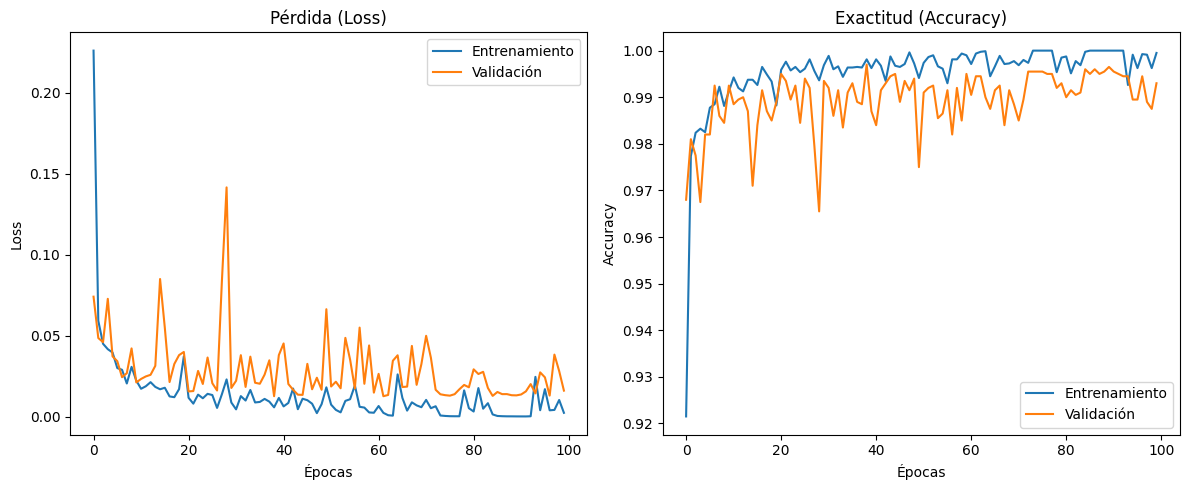

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
import matplotlib.pyplot as plt

# Cargar tu dataset preprocesado
df = pd.read_excel('/content/Dataset_Preprosesado_V1.xlsx')  # Ajusta ruta si es necesario

# Separar variables predictoras y objetivo
X = df.drop(columns=['calidad_auto'])
y = df['calidad_auto']

# Codificar target
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Split en 80/20
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)

# Definir modelo MLP
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')  # 3 clases: Alta, Media, Baja
])

# Compilar modelo
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Entrenar
history = model.fit(X_train, y_train, epochs= 100, batch_size=32,
                    validation_data=(X_test, y_test), verbose=0)

# Gráficas de loss y accuracy
plt.figure(figsize=(12, 5))

# Loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Entrenamiento')
plt.plot(history.history['val_loss'], label='Validación')
plt.title('Pérdida (Loss)')
plt.xlabel('Épocas')
plt.ylabel('Loss')
plt.legend()

# Accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Entrenamiento')
plt.plot(history.history['val_accuracy'], label='Validación')
plt.title('Exactitud (Accuracy)')
plt.xlabel('Épocas')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


In [7]:
model.evaluate(X_test, y_test)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9951 - loss: 0.0168


[0.015977950766682625, 0.9929999709129333]

In [9]:
import pandas as pd

df = pd.read_excel('/content/Dataset_Preprosesado_V1.xlsx')  # o tu path
print(df['calidad_auto'].value_counts(normalize=True))

calidad_auto
1    0.8399
2    0.1052
0    0.0549
Name: proportion, dtype: float64


In [11]:
from sklearn.metrics import classification_report
import numpy as np

# Hacer predicciones
y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)

# Reporte
print(classification_report(y_test, y_pred, target_names=le.classes_.astype(str)))

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       110
           1       1.00      1.00      1.00      1680
           2       0.99      0.98      0.98       210

    accuracy                           0.99      2000
   macro avg       0.98      0.98      0.98      2000
weighted avg       0.99      0.99      0.99      2000

